In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from glob import glob
import pathlib
import common

FONT_SIZE = 15
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [2]:
objective = 'byte_hit_rate'

In [3]:
marker_map = {
    'Belady': '1',
    'S4LRU': 'd',
    'LFUDA': 'o',
    'Adaptive-TinyLFU': 'v',
#     'BeladySample': '#000080',
    'GDBT': '*',
#     'LR': 'r',
    'LRUK': '>',
    
    'GDSF': '8',
    'LRU': 's',
    
#     'Hyperbolic': 'chartreuse',
    'LeCaR': 'p',
    'AdaptSize': 'P',
    'LHD': '+',
    'GDWheel': 'x',
    
}

In [4]:
color_map = {
    'Belady': 'k',
#     'BeladySample': '#000080',
    'GDBT': 'b',
#     'LR': 'r',
    'LRUK': 'g',
    'LFUDA': '#808080',
    'GDSF': 'm',
    'LRU': '#59b300',
    'S4LRU': 'r',
#     'Hyperbolic': 'chartreuse',
    'LeCaR': '#ed740b',
    'AdaptSize': '#669999',
    'LHD': '#336699',
    'GDWheel': '#000080',
    'Adaptive-TinyLFU': 'burlywood',
}

In [5]:
trace_map = {
    'traceHK.tr': 'Akamai HK',
    'traceUS.tr': 'Akamai US',
    'wc200m.tr': 'Wikipedia',
    'wc400m.tr': 'Wikipedia',
    'memc_200m.tr': 'Memcachier',
    'msr_big_200m.tr': 'MSR Storage',
    'anonymous_200m.tr': 'Anonymous Application',
    'caida_cache_200m.tr': 'Caida',
}

In [6]:
def label_map(alg):
    if alg == 'Adaptive-TinyLFU':
        return 'TinyLFU'
    return alg

In [7]:
def cache_type_to_color(s: str):
    if s in color_map:
        return color_map[s]
    raise Exception(f'color {s} is not defined in color map')

In [8]:
def top_algorithm_all_trace_csizes(df, objective='byte_hit_rate', k=4):
    top_algs = set()
    df1 = df[~df.cache_type.isin(['GDBT', 'Belady'])].groupby(['trace_file', 'cache_type', 'cache_size'])\
       .agg({objective: 'max'}).reset_index().groupby(['cache_size', 'trace_file'])
    for l, grp in df1:
        top_alg = set(grp.sort_values(by=[objective],  ascending=False).cache_type[0:k])
        top_algs = top_algs.union(top_alg)
    return top_algs

In [9]:
# find top algorithms
df = common.load_reports()

filter_idx = (
    (df.trace_file == 'traceHK.tr') 
    & (df.uni_size == 0)
    & (~df.cache_type.isin(['Inf', 'BeladySample', 'BeladyTruncate', 'LRU2', 'ThS4LRU', 'ThLRU', 'LR'])) 
    & (1000000000 <= df.cache_size)
    & (df.cache_size <= 400000000000)
    & (df.n_warmup == 80000000)
) | ((df.trace_file == 'traceUS.tr') 
    & (df.uni_size == 0)
    & (~df.cache_type.isin(['Inf', 'BeladySample', 'BeladyTruncate', 'LRU2', 'ThS4LRU', 'ThLRU', 'LR'])) 
    & (1000000000 <= df.cache_size)
    & (df.cache_size <= 400000000000)
    & (df.n_warmup == 100000000)
    & ((df.cache_type != 'LRUK') | (df.k == '4'))
) | (
    (df.trace_file == 'wc400m.tr') 
    & (df.uni_size == 0)
    & (~df.cache_type.isin(['Inf', 'BeladySample', 'BeladyTruncate', 'LRU2', 'ThS4LRU', 'ThLRU', 'LR'])) 
    & (1000000000 <= df.cache_size)
    & (df.cache_size <= 400000000000)
    & (df.n_warmup == 80000000)
    & ((df.cache_type != 'LRUK') | (df.k == '4'))
)

df1 = df[filter_idx].copy()

In [10]:
top_algs = top_algorithm_all_trace_csizes(df1, k=2)
top_algs

{'Adaptive-TinyLFU', 'LFUDA', 'LRU', 'LRUK', 'LeCaR', 'S4LRU'}

In [11]:
FONT_SIZE = 26
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [12]:
trace = 'traceHK.tr'
scale = 1e9
scale_label = 'GiB'

df = common.load_reports()
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
    & (~df.cache_type.isin(['Inf', 'BeladySample', 'BeladyTruncate', 'LRU2', 'ThS4LRU', 'ThLRU', 'LR']))  
    & (1000000000 <= df.cache_size)
    & (df.cache_size <= 400000000000)
    & (df.n_warmup == 80000000)
#     & ((df.cache_type != 'LRUK') | (df.k == '4'))
)

df1 = df[filter_idx].copy()

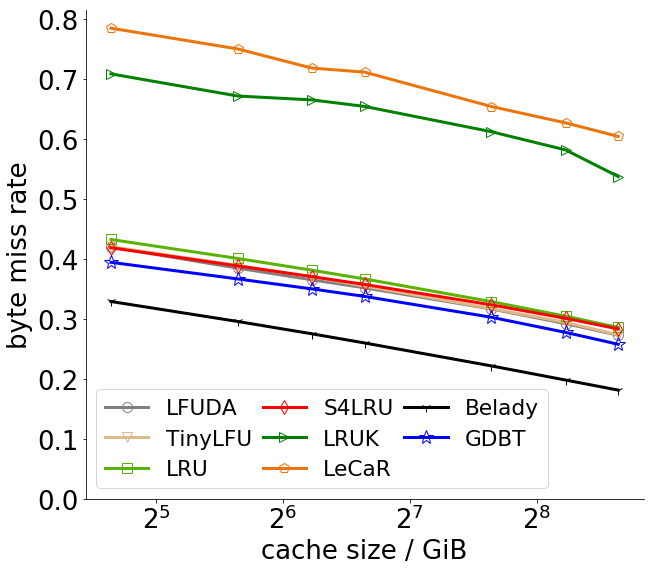

In [13]:
fig, ax = plt.subplots(figsize=(10, 9))
for alg in list(top_algs)+['Belady', 'GDBT']:
    grp = df1[df1.cache_type == alg].groupby('cache_size').agg({objective: 'max'}).reset_index()
    grp = grp.sort_values(by=['cache_size'])
    if alg == 'GDBT':
        markersize = 14
    else:
        markersize = 10
    ax.semilogx(grp.cache_size/scale,
              1-grp[objective], 
              c=cache_type_to_color(alg), 
              label=label_map(alg), 
              marker=marker_map[alg], 
              markersize=markersize,
              markerfacecolor="None",
              basex=2)

plt.ylim(bottom=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(f'cache size / {scale_label}')
plt.ylabel('byte miss rate')
plt.legend(ncol=3, 
           fontsize='small',
           columnspacing=0.5)
# plt.title(f'{trace_map[trace]}')
plt.show()

In [14]:
trace = 'traceUS.tr'
scale = 1e9
scale_label = 'GiB'

df = common.load_reports()
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
    & (~df.cache_type.isin(['Inf', 'BeladySample', 'BeladyTruncate', 'LRU2', 'ThS4LRU', 'ThLRU', 'LR'])) 
    & (1000000000 <= df.cache_size)
    & (df.cache_size <= 400000000000)
    & (df.n_warmup == 100000000)
    & ((df.cache_type != 'LRUK') | (df.k == '4'))
)

df1 = df[filter_idx].copy()

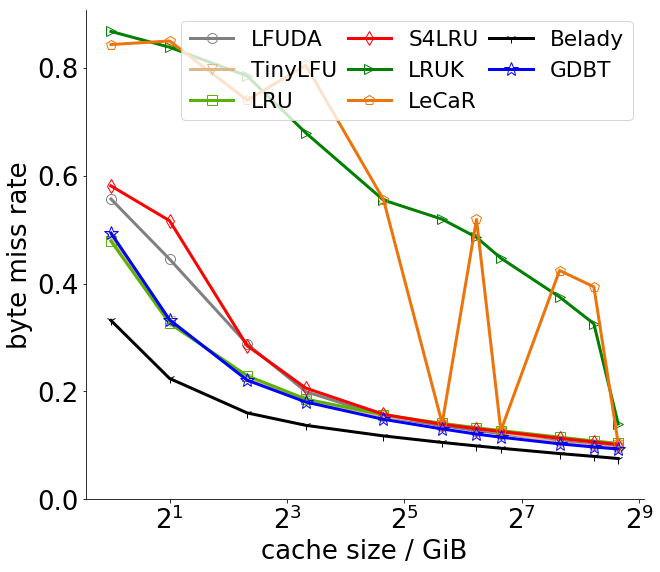

In [15]:
fig, ax = plt.subplots(figsize=(10, 9))
for alg in list(top_algs)+['Belady', 'GDBT']:
    grp = df1[df1.cache_type == alg].groupby('cache_size').agg({objective: 'max'}).reset_index()
    grp = grp.sort_values(by=['cache_size'])
    if alg == 'GDBT':
        markersize = 14
    else:
        markersize = 10
    ax.semilogx(grp.cache_size/scale,
              1-grp[objective], 
              c=cache_type_to_color(alg), 
              label=label_map(alg), 
              marker=marker_map[alg], 
              markersize=markersize,
              markerfacecolor="None",
              basex=2)

plt.ylim(bottom=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(f'cache size / {scale_label}')
plt.ylabel('byte miss rate')
plt.legend(ncol=3, 
           fontsize='small',
           columnspacing=0.5)
# plt.title(f'{trace_map[trace]}')
plt.show()

In [16]:
trace = 'wc400m.tr'
scale = 1e9
scale_label = 'GiB'

df = common.load_reports()
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
     & (~df.cache_type.isin(['Inf', 'BeladySample', 'BeladyTruncate', 'LRU2', 'ThS4LRU', 'ThLRU', 'LR'])) 
    & (1000000000 <= df.cache_size)
    & (df.cache_size <= 400000000000)
    & (df.n_warmup == 80000000)
    & ((df.cache_type != 'LRUK') | (df.k == '4'))
)

df1 = df[filter_idx].copy()

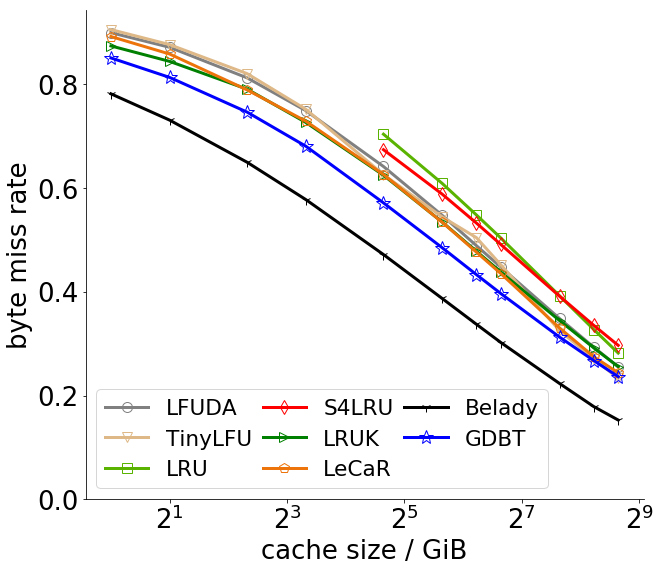

In [17]:
fig, ax = plt.subplots(figsize=(10, 9))
for alg in list(top_algs)+['Belady', 'GDBT']:
    grp = df1[df1.cache_type == alg].groupby('cache_size').agg({objective: 'max'}).reset_index()
    grp = grp.sort_values(by=['cache_size'])
    if alg == 'GDBT':
        markersize = 14
    else:
        markersize = 10
    ax.semilogx(grp.cache_size/scale,
              1-grp[objective], 
              c=cache_type_to_color(alg), 
              label=label_map(alg), 
              marker=marker_map[alg], 
              markersize=markersize,
              markerfacecolor="None",
              basex=2)

plt.ylim(bottom=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(f'cache size / {scale_label}')
plt.ylabel('byte miss rate')
plt.legend(ncol=3, 
           fontsize='small',
           columnspacing=0.5)
# plt.title(f'{trace_map[trace]}')
plt.show()

In [20]:
# find top algorithms
df = common.load_reports()

filter_idx = ((
    (df.trace_file == 'memc_200m.tr') 
    & (df.uni_size == 0)
     & (~df.cache_type.isin(['Inf', 'BeladySample', 'BeladyTruncate', 'LRU2', 'ThS4LRU', 'ThLRU', 'LR'])) 
    & (10000000 <= df.cache_size)
    & (df.cache_size <= 4000000000)
    & (df.n_warmup == 20000000)
)| (
    (df.trace_file == 'msr_rehash_200m.tr') 
    & (df.uni_size == 0)
     & (~df.cache_type.isin(['Inf', 'BeladySample', 'BeladyTruncate', 'LRU2', 'ThS4LRU', 'ThLRU', 'LR'])) 
    & (1000000000 <= df.cache_size)
    & (df.cache_size <= 1000000000000)
    & (df.n_warmup == 100000000)
) | (
    (df.trace_file == 'anonymous_200m.tr') 
    & (df.uni_size == 0)
     & (~df.cache_type.isin(['Inf', 'BeladySample', 'BeladyTruncate', 'LRU2', 'ThS4LRU', 'ThLRU', 'LR'])) 
    & (50000000 <= df.cache_size)
    & (df.cache_size <= 16000000000)
    & (df.n_warmup == 20000000)
) | (
    (df.trace_file == 'caida_cache_200m.tr') 
    & (df.uni_size == 0)
     & (~df.cache_type.isin(['Inf', 'BeladySample', 'BeladyTruncate', 'LRU2', 'ThS4LRU', 'ThLRU', 'LR'])) 
    & (100000 <= df.cache_size)
    & (df.cache_size <= 100000000)
    & (df.n_warmup == 20000000)
))

df1 = df[filter_idx].copy()

In [21]:
top_algs = top_algorithm_all_trace_csizes(df1, k=1)
top_algs

{'Adaptive-TinyLFU', 'GDSF', 'GDWheel', 'LFUDA', 'LHD', 'LRU', 'LRUK', 'LeCaR'}

In [22]:
top_algs = top_algorithm_all_trace_csizes(df1, k=1)
top_algs

{'Adaptive-TinyLFU', 'GDSF', 'GDWheel', 'LFUDA', 'LHD', 'LRU', 'LRUK', 'LeCaR'}

In [23]:
FONT_SIZE = 34
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [24]:
trace = 'memc_200m.tr'
scale = 1e9
scale_label = 'GiB'

df = common.load_reports()
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
     & (~df.cache_type.isin(['Inf', 'BeladySample', 'BeladyTruncate', 'LRU2', 'ThS4LRU', 'ThLRU', 'LR'])) 
    & (10000000 <= df.cache_size)
    & (df.cache_size <= 4000000000)
    & (df.n_warmup == 20000000)
)

df1 = df[filter_idx].copy()

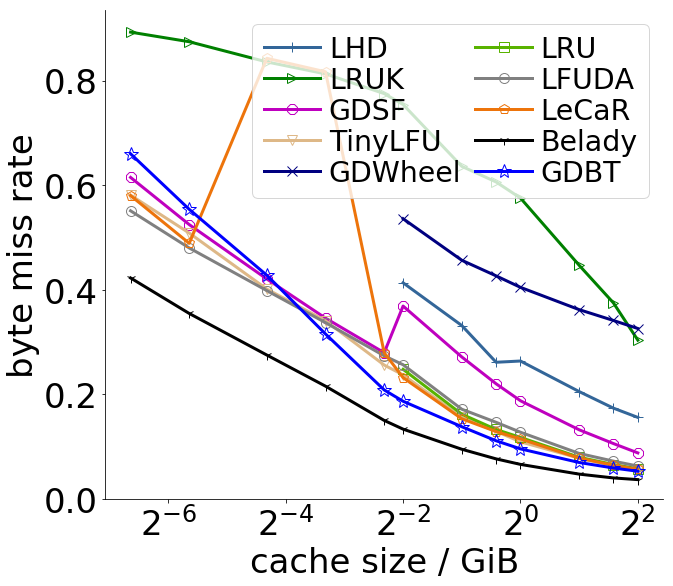

In [25]:
fig, ax = plt.subplots(figsize=(10, 9))
for alg in list(top_algs)+['Belady', 'GDBT']:
    grp = df1[df1.cache_type == alg].groupby('cache_size').agg({objective: 'max'}).reset_index()
    grp = grp.sort_values(by=['cache_size'])
    if alg == 'GDBT':
        markersize = 14
    else:
        markersize = 10
    ax.semilogx(grp.cache_size/scale,
              1-grp[objective], 
              c=cache_type_to_color(alg), 
              label=label_map(alg), 
              marker=marker_map[alg], 
              markersize=markersize,
              markerfacecolor="None",
              basex=2)

plt.ylim(bottom=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(f'cache size / {scale_label}')
plt.ylabel('byte miss rate')
plt.legend(ncol=2, 
           fontsize='small',
           columnspacing=0.5,
           labelspacing=0.1,
          handletextpad=0.3)
# plt.title(f'{trace_map[trace]}')
plt.show()

In [26]:
trace = 'msr_rehash_200m.tr'
scale = 1e9
scale_label = 'GiB'

df = common.load_reports()
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
     & (~df.cache_type.isin(['Inf', 'BeladySample', 'BeladyTruncate', 'LRU2', 'ThS4LRU', 'ThLRU', 'LR'])) 
    & (1000000000 <= df.cache_size)
    & (df.cache_size <= 1000000000000)
    & (df.n_warmup == 100000000)
)

df1 = df[filter_idx].copy()

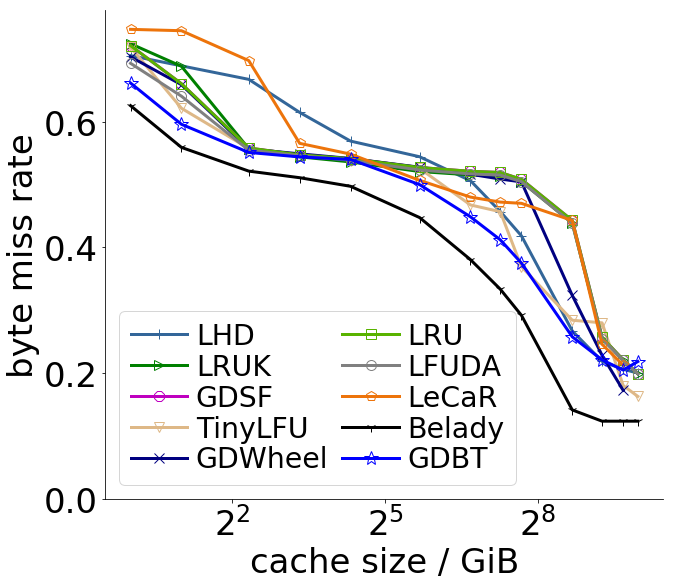

In [27]:
fig, ax = plt.subplots(figsize=(10, 9))
for alg in list(top_algs)+['Belady', 'GDBT']:
    grp = df1[df1.cache_type == alg].groupby('cache_size').agg({objective: 'max'}).reset_index()
    grp = grp.sort_values(by=['cache_size'])
    if alg == 'GDBT':
        markersize = 14
    else:
        markersize = 10
    ax.semilogx(grp.cache_size/scale,
              1-grp[objective], 
              c=cache_type_to_color(alg), 
              label=label_map(alg), 
              marker=marker_map[alg], 
              markersize=markersize,
              markerfacecolor="None",
              basex=2)

plt.ylim(bottom=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(f'cache size / {scale_label}')
plt.ylabel('byte miss rate')
plt.legend(ncol=2, 
           fontsize='small',
           columnspacing=0.5,
           labelspacing=0.1,
          handletextpad=0.3)
# plt.title(f'{trace_map[trace]}')
plt.show()

In [28]:
trace = 'anonymous_200m.tr'
scale = 1e9
scale_label = 'GiB'

df = common.load_reports()
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
    & (~df.cache_type.isin(['Inf', 'BeladySample', 'BeladyTruncate', 'LRU2', 'ThS4LRU', 'ThLRU', 'LR'])) 
    & (50000000 <= df.cache_size)
    & (df.cache_size <= 16000000000)
    & (df.n_warmup == 20000000)
)

df1 = df[filter_idx].copy()

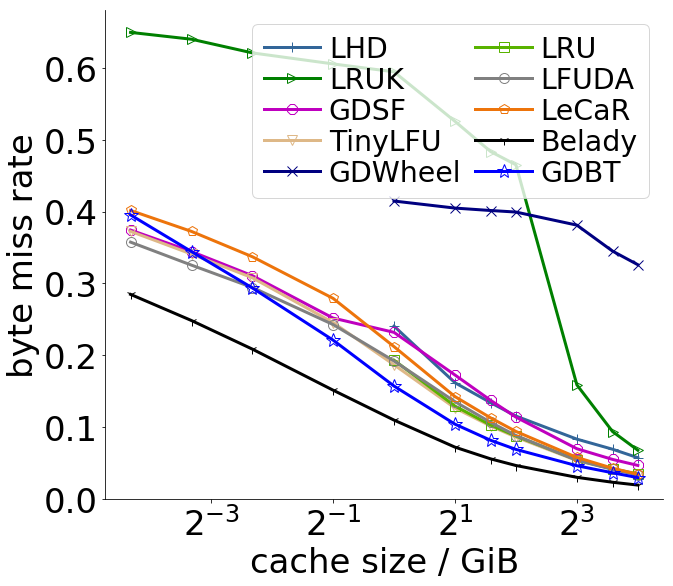

In [29]:
fig, ax = plt.subplots(figsize=(10, 9))
for alg in list(top_algs)+['Belady', 'GDBT']:
    grp = df1[df1.cache_type == alg].groupby('cache_size').agg({objective: 'max'}).reset_index()
    grp = grp.sort_values(by=['cache_size'])
    if alg == 'GDBT':
        markersize = 14
    else:
        markersize = 10
    ax.semilogx(grp.cache_size/scale,
              1-grp[objective], 
              c=cache_type_to_color(alg), 
              label=label_map(alg), 
              marker=marker_map[alg], 
              markersize=markersize,
              markerfacecolor="None",
              basex=2)

plt.ylim(bottom=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(f'cache size / {scale_label}')
plt.ylabel('byte miss rate')
plt.legend(ncol=2, 
           fontsize='small',
           columnspacing=0.5,
           labelspacing=0.1,
          handletextpad=0.3)
# plt.title(f'{trace_map[trace]}')
plt.show()

In [30]:
trace = 'caida_cache_200m.tr'
scale = 1e6
scale_label = 'MiB'

df = common.load_reports()
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
     & (~df.cache_type.isin(['Inf', 'BeladySample', 'BeladyTruncate', 'LRU2', 'ThS4LRU', 'ThLRU', 'LR'])) 
    & (100000 <= df.cache_size)
    & (df.cache_size <= 100000000)
    & (df.n_warmup == 20000000)
)

df1 = df[filter_idx].copy()

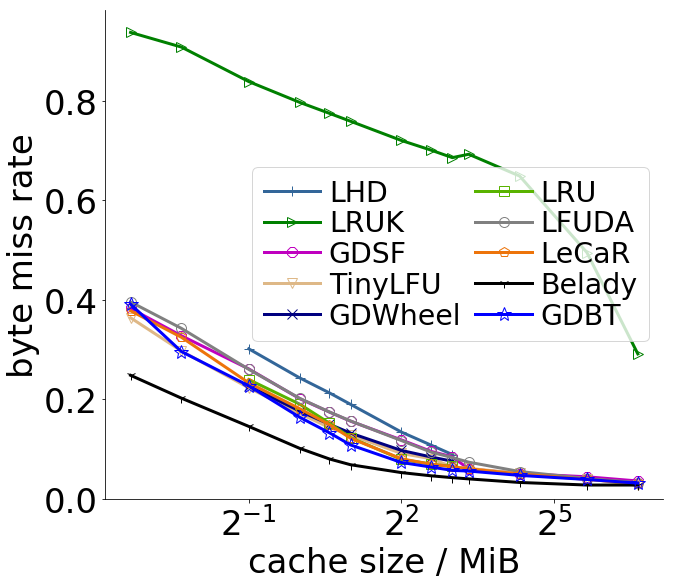

In [31]:
fig, ax = plt.subplots(figsize=(10, 9))
for alg in list(top_algs)+['Belady', 'GDBT']:
    grp = df1[df1.cache_type == alg].groupby('cache_size').agg({objective: 'max'}).reset_index()
    grp = grp.sort_values(by=['cache_size'])
    if alg == 'GDBT':
        markersize = 14
    else:
        markersize = 10
    ax.semilogx(grp.cache_size/scale,
              1-grp[objective], 
              c=cache_type_to_color(alg), 
              label=label_map(alg), 
              marker=marker_map[alg], 
              markersize=markersize,
              markerfacecolor="None",
              basex=2)

plt.ylim(bottom=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(f'cache size / {scale_label}')
plt.ylabel('byte miss rate')
plt.legend(ncol=2, 
           fontsize='small',
           columnspacing=0.5,
           labelspacing=0.1,
          handletextpad=0.3)
# plt.title(f'{trace_map[trace]}')
plt.show()